## Convolutional Neural Network

## Vision Transformers(ViT)


In [3]:
!pip3 install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 208.8 MB 15.3 MB/s eta 0:00:01     |███████████████████████         | 150.2 MB 12.8 MB/s eta 0:00:05
     |████████████████████████████████| 9.7 MB 17.0 MB/s eta 0:00:01
     |████████████████████████████████| 441 kB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 8.5 MB/s  eta 0:00:01
     |████████████████████████████████| 20.6 MB 14.6 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 16.5 MB/s eta 0:00:01
     |████████████████████████████████| 5.5 MB 14.9 MB/s eta 0:00:01
     |████████████████████████████████| 394 kB 13.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 16.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 24.7 MB/s eta 0:00:01
     |████████████████████████████████| 130 kB 18.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 13.7 MB/s eta 0:00:01
     |█████████████████

In [7]:
!pip3 install tensorflow_addons
!pip3 install plotly

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 15.6 MB 33.1 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


## Importing necessary libraries

In [2]:
!pip3 install visualkeras
import os
import warnings
import itertools
import cv2
import seaborn as sns
import pandas as pd
import numpy  as np
from PIL import Image
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

import tensorflow as tf
import tensorflow_addons as tfa
import visualkeras
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.model_selection   import train_test_split
from keras.preprocessing.image import ImageDataGenerator

warnings.filterwarnings('ignore')
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


/Users/leger/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/leger/Library/Python/3.9/lib/python/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


## Setting up general parameters

In [3]:
# General parameters
epochs = 15
pic_size = 240
np.random.seed(42)
tf.random.set_seed(42)

## Data Loading, Preperation and Visualization

In [4]:
folder_path = "brain"
no_images = os.listdir(folder_path + '/no/')
yes_images = os.listdir(folder_path + '/yes/')
dataset=[]
lab=[]

for image_name in no_images:
    image=cv2.imread(folder_path + '/no/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((240,240))
    dataset.append(np.array(image))
    lab.append(0)
    
for image_name in yes_images:
    image=cv2.imread(folder_path + '/yes/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((240,240))
    dataset.append(np.array(image))
    lab.append(1)

In [5]:
dataset = np.array(dataset)
lab = np.array(lab)
print(dataset.shape, lab.shape)

(253, 240, 240, 3) (253,)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(dataset, lab, test_size=0.2, shuffle=True, random_state=42)

In [13]:
def plot_state(state):
    plt.figure(figsize= (12,12))
    for i in range(1, 10, 1):
        plt.subplot(3,3,i)
        img = load_img(folder_path + "/" + state + "/" + os.listdir(folder_path + "/" + state)[i], target_size=(pic_size, pic_size))
        plt.imshow(img)   
    plt.show()

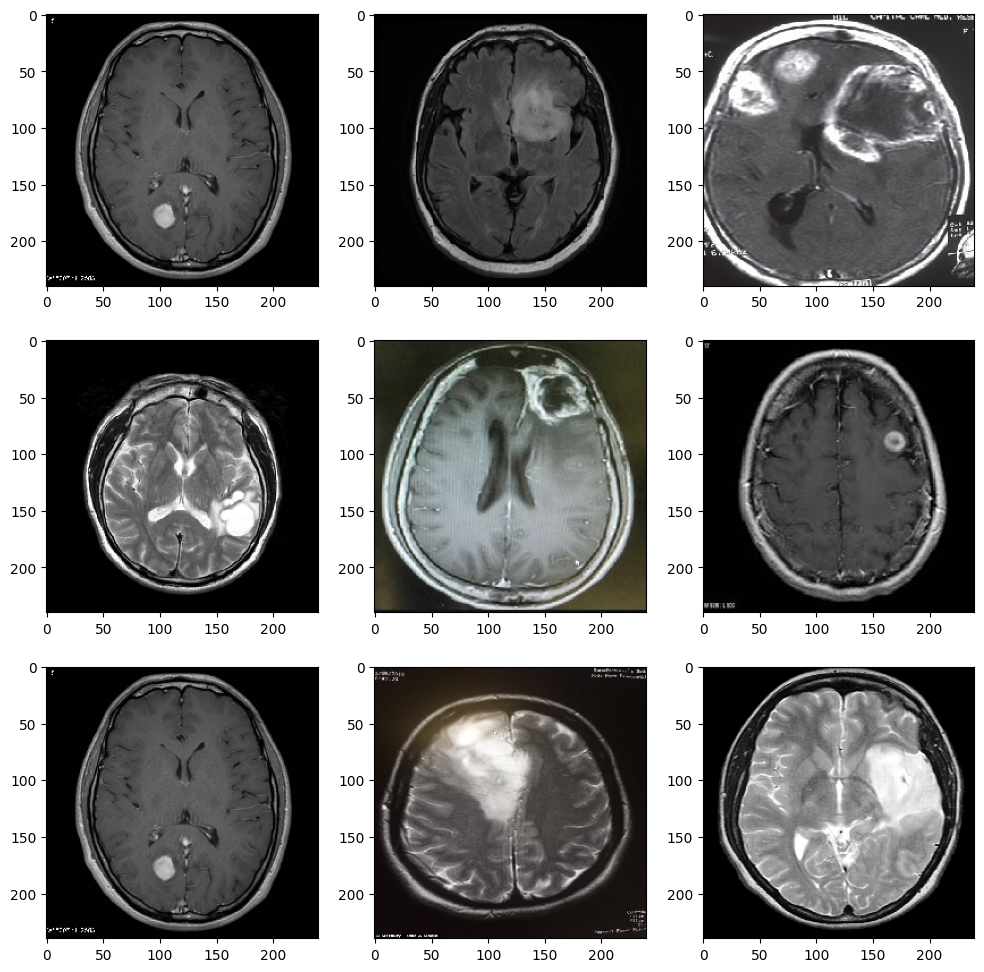

In [14]:
plot_state('yes')

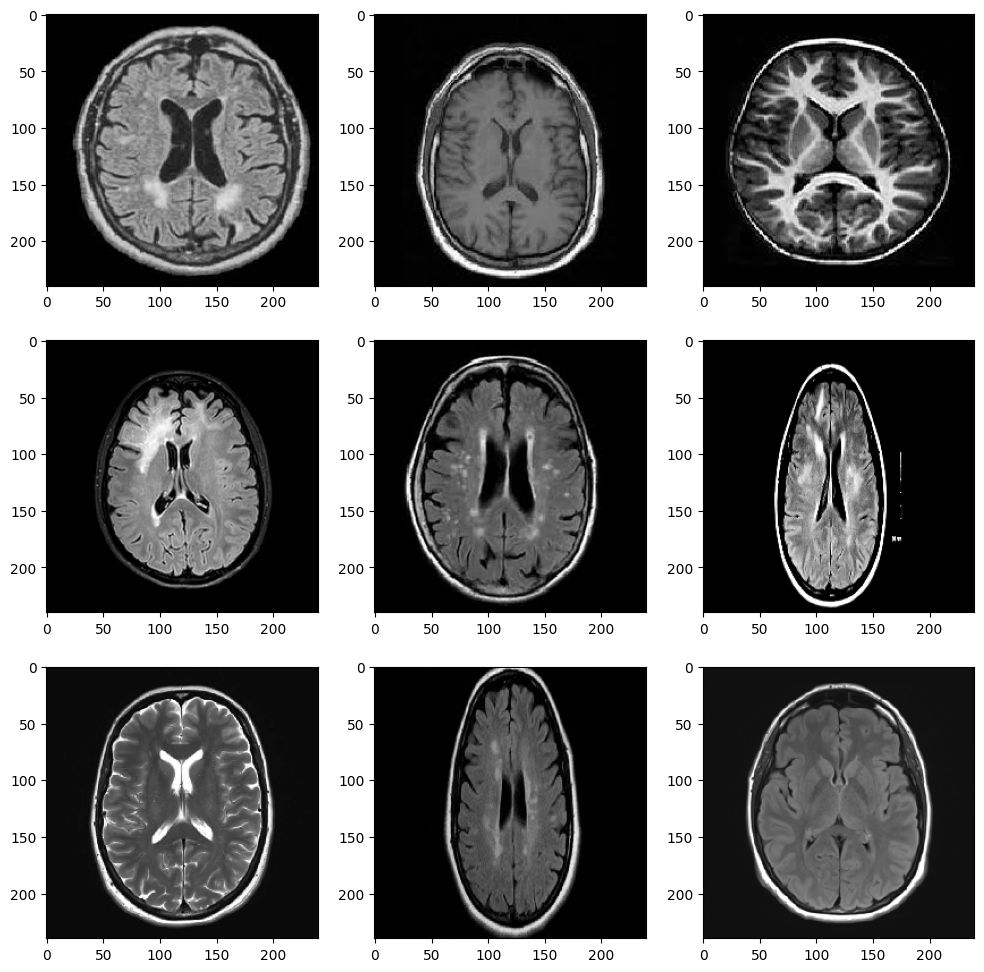

In [15]:
plot_state("no")

## Modeling using CNN

In [16]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(2,2), activation="relu", padding="valid",input_shape=(pic_size,pic_size,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(2,2), activation="relu", padding="valid"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-3), 
                          bias_regularizer=regularizers.L2(1e-2),
                          activity_regularizer=regularizers.L2(1e-3)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 119, 119, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 59, 59, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 64)                4

In [26]:
plot_model(model, show_shapes=True, show_layer_names=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [28]:
#visualkeras.layered_view(model, legend=True)

In [29]:
class_weights = class_weight.compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 1.294871794871795, 1: 0.8145161290322581}

In [30]:
history = model.fit(x_train,y_train,epochs = 100, class_weight=class_weights, validation_data=(x_test, y_test),verbose=1)

Epoch 1/100
7/7 [==============================] - 1s 51ms/step - loss: 51.2888 - accuracy: 0.4554 - val_loss: 5.9133 - val_accuracy: 0.3922
Epoch 2/100
7/7 [==============================] - 0s 36ms/step - loss: 5.6692 - accuracy: 0.4802 - val_loss: 5.1269 - val_accuracy: 0.7255
Epoch 3/100
7/7 [==============================] - 0s 35ms/step - loss: 5.0003 - accuracy: 0.4802 - val_loss: 4.6298 - val_accuracy: 0.3922
Epoch 4/100
7/7 [==============================] - 0s 35ms/step - loss: 4.4932 - accuracy: 0.3861 - val_loss: 4.3113 - val_accuracy: 0.3922
Epoch 5/100
7/7 [==============================] - 0s 35ms/step - loss: 4.2378 - accuracy: 0.3861 - val_loss: 4.1622 - val_accuracy: 0.3922
Epoch 6/100
7/7 [==============================] - 0s 35ms/step - loss: 4.0955 - accuracy: 0.3861 - val_loss: 4.0159 - val_accuracy: 0.3922
Epoch 7/100
7/7 [==============================] - 0s 34ms/step - loss: 3.9576 - accuracy: 0.3861 - val_loss: 3.8972 - val_accuracy: 0.3922
Epoch 8/100
7/7 [==

## CNN model Evaluation

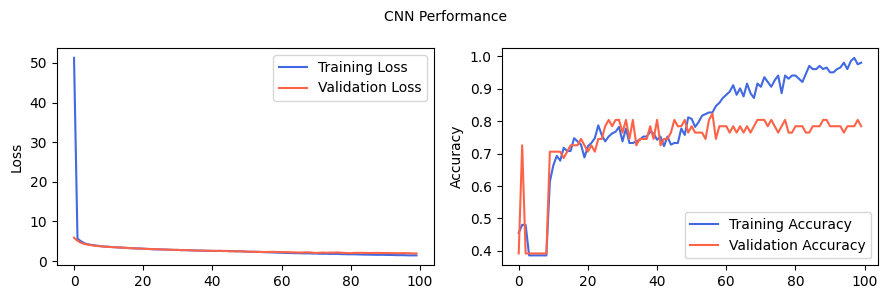

In [45]:
plt.figure(figsize=(9,3))
plt.subplot(1, 2, 1)
plt.suptitle('CNN Performance', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.plot(history.history['loss'], label='Training Loss', c ='royalblue')
plt.plot(history.history['val_loss'], label='Validation Loss', c='tomato')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=10)
plt.plot(history.history['accuracy'], label='Training Accuracy', c ='royalblue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', c ='tomato')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [46]:
results = model.evaluate(x_test, y_test)
print('The current model achieved an accuracy of {}%!'.format(round(results[1]*100,2)))

2/2 [==============================] - 0s 9ms/step - loss: 1.9436 - accuracy: 0.7843
The current model achieved an accuracy of 78.43%!


In [47]:
# compute predictions
predictions = model.predict(x_test)
y_pred = []
for i in predictions:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

2/2 [==============================] - 0s 8ms/step


In [8]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

<Figure size 640x480 with 0 Axes>

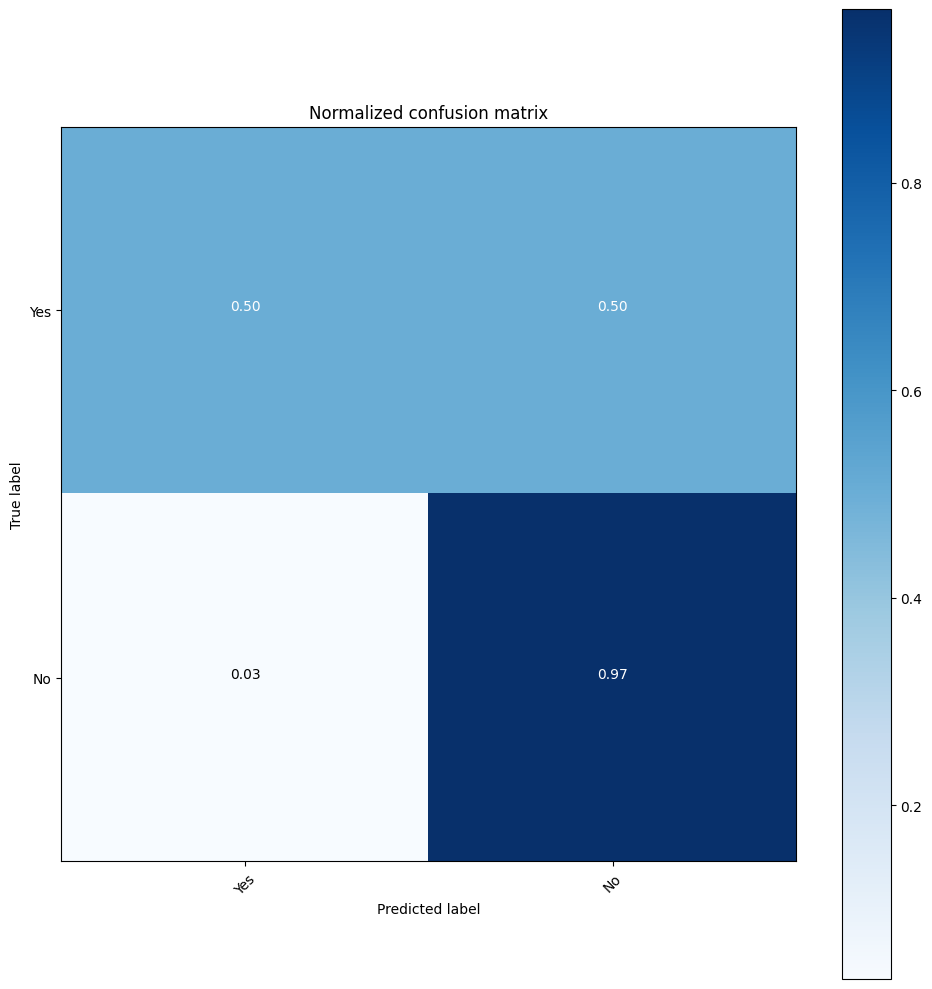

In [49]:
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Yes", "No"], title='Normalized confusion matrix')
plt.show()

## Modeling using Vision Transformers(ViT)

In [7]:
attention_list = []

In [9]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 100
image_size = 240  # We'll resize input images to this size
patch_size = 20  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

## Data augmentation

In [10]:
data_augmentation = tf.keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

## Multi-layer perceptron

In [11]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

## Implement patch creation as a layer

In [12]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 240 X 240
Patch size: 20 X 20
Patches per image: 144
Elements per patch: 1200


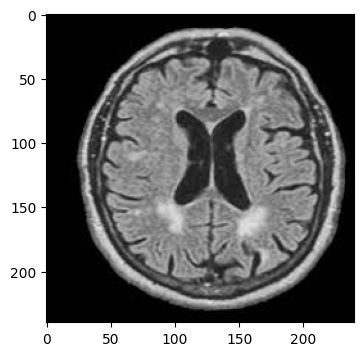

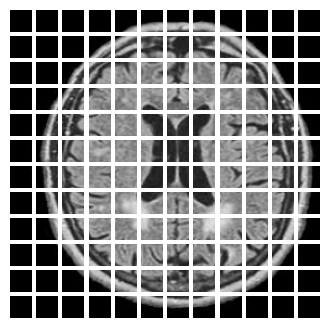

In [14]:
plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")


n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4) )
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")


## Creating the patch encoder
The PatchEncoder layer will linearly transform a patch by projecting it into a vector of size projection_dim. In addition, it adds a learnable position embedding to the projected vector.

In [15]:
class PatchEncoder(tf.keras.layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

## Building the ViT

The ViT model consists of multiple Transformer blocks, which use the layers.MultiHeadAttention layer as a self-attention mechanism applied to the sequence of patches. The Transformer blocks produce a [batch_size, num_patches, projection_dim] tensor, which is processed via an classifier head with softmax to produce the final class probabilities output.

Unlike the technique described in the paper, which prepends a learnable embedding to the sequence of encoded patches to serve as the image representation, all the outputs of the final Transformer block are reshaped with layers.Flatten() and used as the image representation input to the classifier head. Note that the layers.GlobalAveragePooling1D layer could also be used instead to aggregate the outputs of the Transformer block, especially when the number of patches and the projection dimensions are large.

In [16]:
def create_vit_classifier():
    inputs = layers.Input(shape=(240, 240, 3))
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim, dropout=0.1)(x1, x1)
        #attention_list.append(att_weights)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(2)(features)
    # Create the Keras model.
    model = tf.keras.Model(inputs=inputs, outputs=logits)
    return model


In [17]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            tf.keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_data=(x_test, y_test),
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history

In [18]:
vit_classifier = create_vit_classifier()
vit_history = run_experiment(vit_classifier)

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 1.4462 - accuracy: 0.5248 - top-5-accuracy: 1.0000 - val_loss: 3.2697 - val_accuracy: 0.7059 - val_top-5-accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 4s 4s/step - loss: 3.1788 - accuracy: 0.7178 - top-5-accuracy: 1.0000 - val_loss: 18.0750 - val_accuracy: 0.3725 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 3s 3s/step - loss: 17.4350 - accuracy: 0.4059 - top-5-accuracy: 1.0000 - val_loss: 4.6850 - val_accuracy: 0.6078 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 5.4700 - accuracy: 0.6139 - top-5-accuracy: 1.0000 - val_loss: 1.1256 - val_accuracy: 0.7059 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 1.4275 - accuracy: 0.6881 - top-5-accuracy: 1.0000 - val_loss: 4.3414 - val_accuracy: 0.3922 - val_top-5-accuracy: 1.0000
Epoch 6/100
1/1 [=====================

input_1 (240, 240, 3)
data_augmentation (240, 240, 3)
patches_5 (1, 240, 240, 3)
patch_encoder (1, 144, 1200)
layer_normalization (1, 144, 64)
multi_head_attention (1, 144, 64)


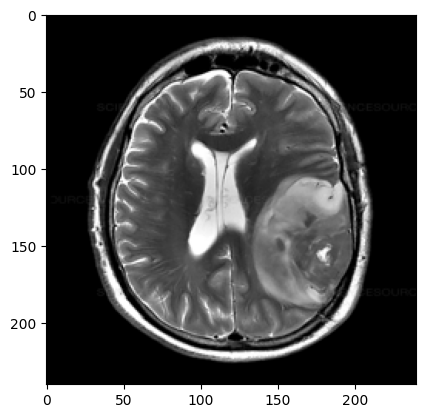

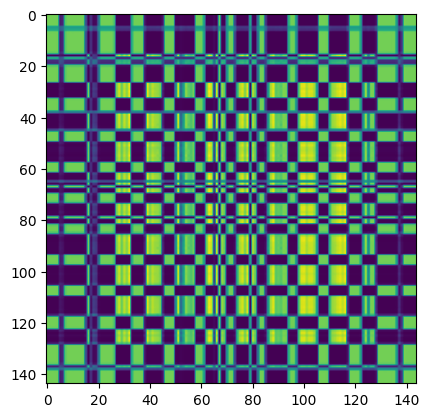

In [119]:
image = x_train[np.random.choice(range(x_train.shape[0]))]
x=image
layer_names = ['input_1', 'data_augmentation', 'patches_5', 'patch_encoder', 'layer_normalization', 'multi_head_attention']
layer_list = []
for name in layer_names:
    lay = vit_classifier.get_layer(name)
    layer_list.append(lay)
    print(name, x.shape)

    if ('attention' in name):
        _, score = lay(x, x, return_attention_scores = True)
    else:
        x = lay(x)

plt.imshow(image)
plt.show()
attention_score = score.numpy()
plt.imshow(attention_score)


## Notes about the ViT performance

The state of the art results reported in the paper are achieved by pre-training the ViT model using the JFT-300M dataset, then fine-tuning it on the target dataset. To improve the model quality without pre-training, you can try to train the model for more epochs, use a larger number of Transformer layers, resize the input images, change the patch size, or increase the projection dimensions. Besides, as mentioned in the paper, the quality of the model is affected not only by architecture choices, but also by parameters such as the learning rate schedule, optimizer, weight decay, etc. In practice, it's recommended to fine-tune a ViT model that was pre-trained using a large, high-resolution dataset.

## ViT model Evaluation

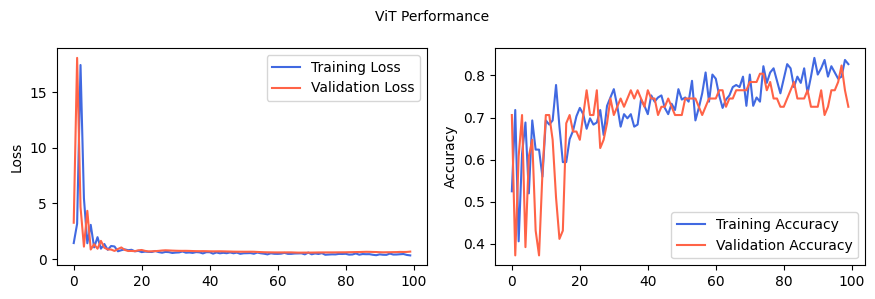

In [19]:
plt.figure(figsize=(9,3))
plt.subplot(1, 2, 1)
plt.suptitle('ViT Performance', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.plot(vit_history.history['loss'], label='Training Loss', c ='royalblue')
plt.plot(vit_history.history['val_loss'], label='Validation Loss', c='tomato')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=10)
plt.plot(vit_history.history['accuracy'], label='Training Accuracy', c ='royalblue')
plt.plot(vit_history.history['val_accuracy'], label='Validation Accuracy', c ='tomato')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [85]:
# compute predictions
vit_predictions = vit_classifier.predict(x_test)
vit_y_pred = [np.argmax(probas) for probas in vit_predictions]

2/2 [==============================] - 1s 160ms/step


<Figure size 640x480 with 0 Axes>

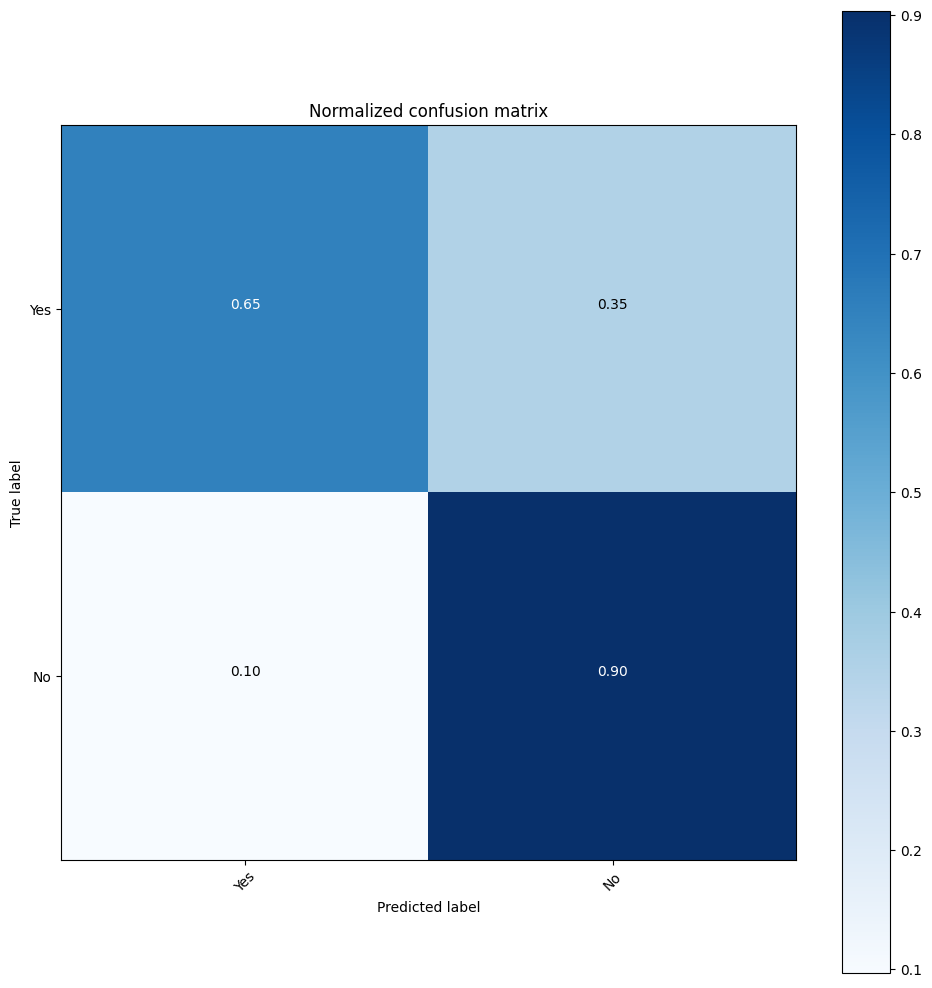

In [86]:
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, vit_y_pred)
np.set_printoptions(precision=2)
# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Yes", "No"], title='Normalized confusion matrix')
plt.show()